In [2]:
%reload_kedro

2019-06-27 16:25:14,361 - root - INFO - ** Kedro project Twitter Network
2019-06-27 16:25:14,365 - anyconfig - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/logging.yml
2019-06-27 16:25:14,376 - anyconfig - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/catalog.yml
2019-06-27 16:25:14,397 - anyconfig - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/credentials.yml
2019-06-27 16:25:14,402 - anyconfig - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/parameters.yml
2019-06-27 16:25:14,423 - root - INFO - Defined global variables proj_dir, proj_name, conf and io


In [5]:
G = io.load('DiG_train')

2019-06-27 16:26:09,867 - kedro.io.data_catalog - INFO - Loading data from `DiG_train` (PickleLocalDataSet)...


In [3]:
edges_test = io.load('edges_test'); edges_test

2019-06-27 16:25:28,182 - kedro.io.data_catalog - INFO - Loading data from `edges_test` (PickleLocalDataSet)...


[('2184483', '1300190'),
 ('3151356', '1452193'),
 ('1579396', '193159'),
 ('1406432', '2481036'),
 ('2389638', '593017'),
 ('228206', '212805'),
 ('1237964', '879115'),
 ('3318124', '1840575'),
 ('4522929', '1552625'),
 ('3406737', '3781412'),
 ('1567983', '3008412'),
 ('4370932', '2906415'),
 ('286240', '474307'),
 ('4796773', '3115614'),
 ('2207765', '4354226'),
 ('1283384', '279636'),
 ('368544', '2431466'),
 ('3921857', '4512147'),
 ('49037', '3175009'),
 ('61633', '1064392'),
 ('1459453', '654182'),
 ('447597', '2736867'),
 ('2121585', '3413796'),
 ('933347', '1131654'),
 ('3733033', '488937'),
 ('3023014', '2817859'),
 ('1404783', '410037'),
 ('1886158', '3656408'),
 ('3316731', '4579088'),
 ('2369031', '1860112'),
 ('2850334', '755258'),
 ('4606553', '2879440'),
 ('3013323', '2064734'),
 ('1653770', '1190291'),
 ('4540325', '202508'),
 ('4189431', '4404645'),
 ('1590268', '3824559'),
 ('2717491', '421433'),
 ('71500', '2156609'),
 ('2422900', '325927'),
 ('784291', '4194667'),


In [7]:
from networkx.algorithms.connectivity import build_auxiliary_edge_connectivity
H = build_auxiliary_edge_connectivity(G)

In [ ]:
from networkx.algorithms.flow import build_residual_network
R = build_residual_network(H, 'capacity')

In [11]:
import pickle
with open("data/02_intermediate/graphs/auxiliary.pkl", "wb") as f:
    pickle.dump(H, f)

In [ ]:
small_test = edges_test[:10]
edge_connectivity = [local_edge_connectivity(G, source, sink, auxiliary=H, residual=R) for source, sink in small_test]

In [70]:
import numpy as np
import pandas as pd
with open("test_connectivity.pkl", "rb") as f:
    connnectivity = pickle.load(f)
connectivity.describe()

count    2000.000000
mean       33.731500
std        51.559302
min         0.000000
25%         4.000000
50%        15.000000
75%        41.000000
max       435.000000
dtype: float64

(array([1528.,  268.,  107.,   44.,   19.,   16.,    5.,    4.,    5.,
           4.]),
 array([  0. ,  43.5,  87. , 130.5, 174. , 217.5, 261. , 304.5, 348. ,
        391.5, 435. ]),
 <a list of 10 Patch objects>)

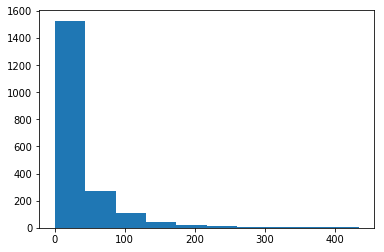

In [74]:
from matplotlib import pyplot as plt
plt.hist(connectivity)